In [233]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Загружаем специальный удобный инструмент для сентиментального анализа
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#импортируем библиотеку geopy
from geopy.distance import geodesic as GD 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


In [234]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [235]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

In [236]:
# Подгрузим наши данные из соревнования

DATA_DIR = '/kaggle/input/sf-booking/'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') # датасет для обучения
df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') # датасет для предсказания
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv') # самбмишн

In [237]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [238]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097


In [239]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [240]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443


In [241]:
sample_submission.head(2)

,reviewer_score,id
0,1,488440
1,10,274649


In [242]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


In [243]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [244]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Анализ отзывов о бронировании отелей

Исходя из условий задачи и после знакомства с данными концепция исследования такова.

Восприятие всей совокупности условий размещения и проживания в отеле дело субъективное и в связи с этим, мне видится, что коментарии и теги, которые оставляют посетители оказывают существенное влияние на рейтинг отеля. И в одном и в другом признаке много текста. При этом теги на мой взгляд больше отвечают на вопрос "какие опции для человека были важны при выборе отеля" (можно ли с животными, подойдет ли для детей, и так далее), а комментарии, кроме прочего, показывают насколько человека удовлетворила реализация данных опций. Поэтому я для своей модели создала несколько признаков на основе комментариев. Кроме того, предполагаю, что время года, в которое произошло посещение отеля, также могло повлиять на оценку (некоторые достоинства отеля можно оценить только сезонно). Ну и если человек останавливается в отеле в коммандировке или на отдыхе с целью осмотра достопримечательностей, для него на оценку отеля может существенно повлиять его местоположение относительно центра города, поэтому намерена получить признак характеризующий расстояние от отеля до центра города путем преобразования признаков координат отелей. Это основное, что намерена сделать, также посмотр как другие данные будут себя вести, возможно в процессе потребуются и  другие преобразования.

In [245]:
# Преобразуем в формат даты
data['review_date'] = pd.to_datetime(data['review_date'], format='%m/%d/%Y')

In [246]:
# приведем тексты отзывов к нижнему регистру
def get_lower_case(text):
    text = text.lower()
    return text

data['negative_review'] = data['negative_review'].apply(get_lower_case)
data['positive_review'] = data['positive_review'].apply(get_lower_case)

# посмотрим на 40 самых часто встречающихся вариантов в каждой категории отзывов
negative_count = data.negative_review.value_counts()
negative_count_list = negative_count[:40].index
print(negative_count_list)

positive_count = data.positive_review.value_counts()
positive_count_list = positive_count[:40].index
print(positive_count_list)

Index(['no negative', ' nothing', ' nothing ', ' n a', ' none', ' ',
       ' breakfast', ' small room', ' location', ' all good',
       ' nothing really', ' everything', ' no complaints', ' nil', ' price',
       ' nothing really ', ' na', ' nothing at all', ' small rooms',
       ' nothing to dislike', ' nothing at all ', ' none ', ' no complaints ',
       ' room size', ' no', ' expensive', ' staff', ' very small room',
       ' all good ', ' everything was perfect', ' absolutely nothing ',
       ' can t think of anything ', ' everything was perfect ',
       ' nothing to dislike ', ' non', ' leaving',
       ' nothing to complain about ', ' everything was great ', ' leaving ',
       ' having to leave '],
      dtype='object')
Index(['no positive', ' location', ' everything', ' nothing', ' the location',
       ' great location', ' good location', ' location ', ' breakfast',
       ' everything ', ' friendly staff', ' staff', ' excellent location',
       ' great location ', ' lo

In [247]:
# создадим списки отзывов, которые не несут смысловой нагрузки
not_negative_list = ['no negative', ' nothing', ' nothing ', ' n a', ' none', ' ',
                     ' all good', ' nothing really', ' no complaints', ' nil', ' nothing really ', ' na',
                     ' nothing at all', ' nothing to dislike', ' nothing at all ', ' none ', ' no complaints ', ' no',
                     ' absolutely nothing ', ' can t think of anything ', ' nothing to dislike ', ' non', ' nothing to complain about ']

not_positive_list = ['no positive', ' nothing', ' nothing ',  ' ']


In [248]:
# заменим такие отзывы оценкой neutral
negative_mask = data.negative_review.isin(not_negative_list)
positive_mask = data.positive_review.isin(not_positive_list)

data.loc[negative_mask, 'negative_review'] = 'neutral'
data.loc[positive_mask, 'positive_review'] = 'neutral'


In [249]:
# на основе сентименталььного анализа выделим по три новых признака: Положительный, Отрицательный и Нейтральный
sent_analyzer = SentimentIntensityAnalyzer()

negative_polarity_scores = [sent_analyzer.polarity_scores(x) for x in data.negative_review.tolist()]
positive_polarity_scores = [sent_analyzer.polarity_scores(x) for x in data.positive_review.tolist()]
data['n_negative'] = [x['neg'] for x in negative_polarity_scores]
data['n_neutral'] = [x['neu'] for x in negative_polarity_scores]
data['n_positive'] = [x['pos'] for x in negative_polarity_scores]
data['n_compound'] = [x['compound'] for x in negative_polarity_scores]

data['p_negative'] = [x['neg'] for x in positive_polarity_scores]
data['p_neutral'] = [x['neu'] for x in positive_polarity_scores]
data['p_positive'] = [x['pos'] for x in positive_polarity_scores]
data['p_compound'] = [x['compound'] for x in positive_polarity_scores]


In [250]:
# Проектирование прочих новых признаков
def designing_new_signs(data: pd.DataFrame):
    data['splited_tags'] = data['tags'].str.findall(r"'[\w\s]+'")
    data['splited_tags'] = data['splited_tags'].apply(lambda x: [y[1:-1].strip() for y in x])
    data['count_nights'] = data['splited_tags'].apply(lambda x: ' '.join(x))
    data['count_nights'] = data['count_nights'].apply(lambda x: int(x[x.find('Stayed') + 7:x.find('Stayed') + 9]) if x.find('Stayed') != -1 else 1)
    data['hotel_country'] = data['hotel_address'].apply(lambda x: ' '.join(x.split()[-2:]) if x.find('Kingdom') != -1 else x.split()[-1])
    data['hotel_city'] = data['hotel_address'].apply(lambda x: ' '.join(x.split()[-5:-4]) if x.find('Kingdom') != -1 else x.split()[-2])
    
    return data
data = designing_new_signs(data)

In [251]:
#выделим месяц в отдельный столбец
data['month'] = data['review_date'].dt.month

# Создаем новый признак 'season'
def get_season(month):
    if month in [12, 1, 2]:
        return '2'
    elif month in [3, 4, 5]:
        return '4'
    elif month in [6, 7, 8]:
        return '1'
    else:
        return '3'

data['season'] = data['month'].apply(get_season)
data=data.astype({'season': 'int8'}) #здесь вынужденная мера изменения типа данных, ранее предпринимала 
                                     # попыку кодирования признака "сезон" с помощью OrdinalEncoder, 
                                     # но имела два признака с одним названием и при удалении 
                                     # всех признаков типа object удалялись оба

In [252]:
# заполнение пропущенных значений координат отелей модой с учетом города, в котором находится отель
for city in data['hotel_city'].unique():
    mask = data['hotel_city'] == city
    data.loc[mask, 'lat'] = data[mask]['lat'].fillna(data[mask]['lat'].mode()[0])
    data.loc[mask, 'lng'] = data[mask]['lng'].fillna(data[mask]['lng'].mode()[0])

In [253]:
#Создадим признак 'distance' расстояние от отеля до центра города

data['coord'] = list(zip(data['lat'],data['lng'])) #создадим признак 'coord' (координаты отеля)
# создадим DataFrame с координатами центров городов, в которых расположены отели
df_center = pd.DataFrame({'hotel_city':['London',
                                  'Amsterdam',
                                  'Barcelona',
                                  'Milan',
                                  'Vienna',
                                  'Paris'],
                  'coord_center':[(51.5085, -0.12574),
                                   (52.374, 4.88969),
                                   (41.3888, 2.15899),
                                   (45.4643, 9.18951),
                                   (48.2085, 16.3721),
                                   (48.8534, 2.3488)]})
# объединим созданный DataFrame с нашими данными 
data = data.merge(df_center, on = 'hotel_city', how = 'left')

#создадим признак distance
def get_distance(arg):
    arg1 = arg['coord']
    arg2 = arg['coord_center']
    return round(GD(arg1, arg2).km, 1) 
data['distance'] = data.apply(lambda arg: get_distance (arg), axis = 1)


In [254]:
#Кодирование признаков
import category_encoders as ce

bin_encoder = ce.BinaryEncoder(['reviewer_nationality'])
df_bin = bin_encoder.fit_transform(data[['reviewer_nationality']])
data = pd.concat([data, df_bin], axis=1)

bin_encoder_1 = ce.BinaryEncoder(cols=['count_nights'])
type_bin = bin_encoder_1.fit_transform(data['count_nights'])
data = pd.concat([data, type_bin], axis=1)

data = pd.get_dummies(data, columns=['hotel_city'])

onehot_encoder = ce.OneHotEncoder(cols=['hotel_country'])
df_onehot = onehot_encoder.fit_transform(data['hotel_country'])
data = pd.concat([data, df_onehot], axis=1)

data['distance'] = data['distance'].astype('category').cat.codes


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

<AxesSubplot:>

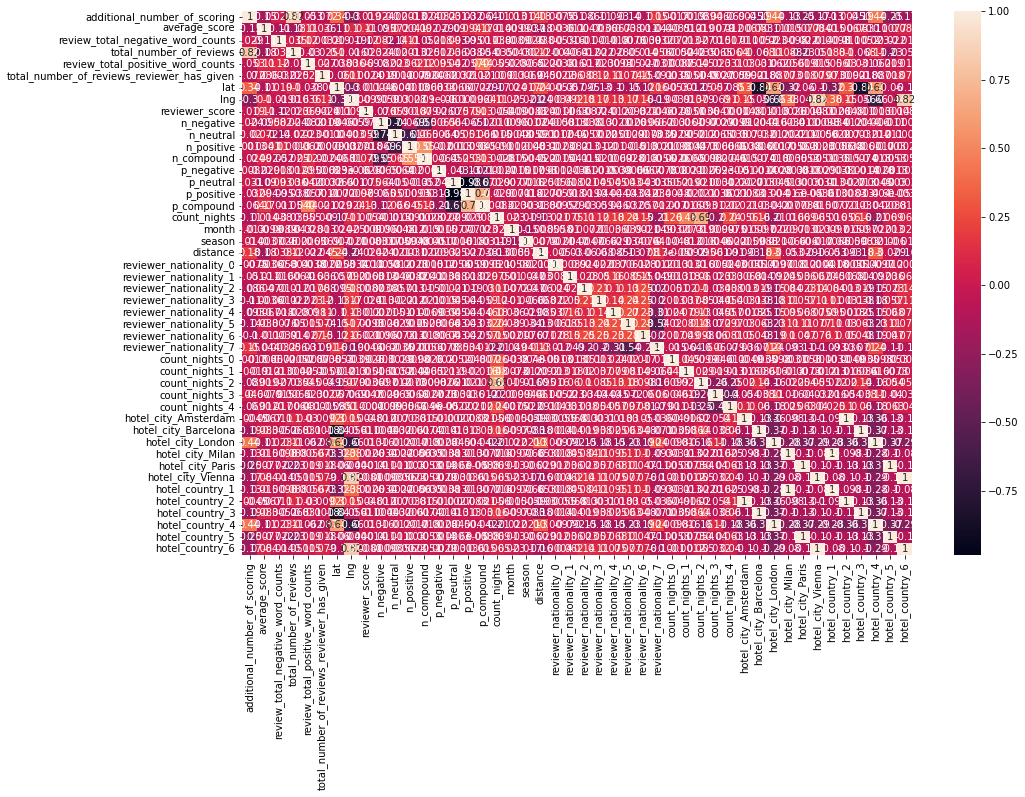

In [256]:
# Отбор признаков
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [257]:
# удаляем мультиколлинеарные признаки
data.drop(['review_total_negative_word_counts','additional_number_of_scoring', 'lat', 'lng'], axis=1, inplace=True)

<AxesSubplot:>

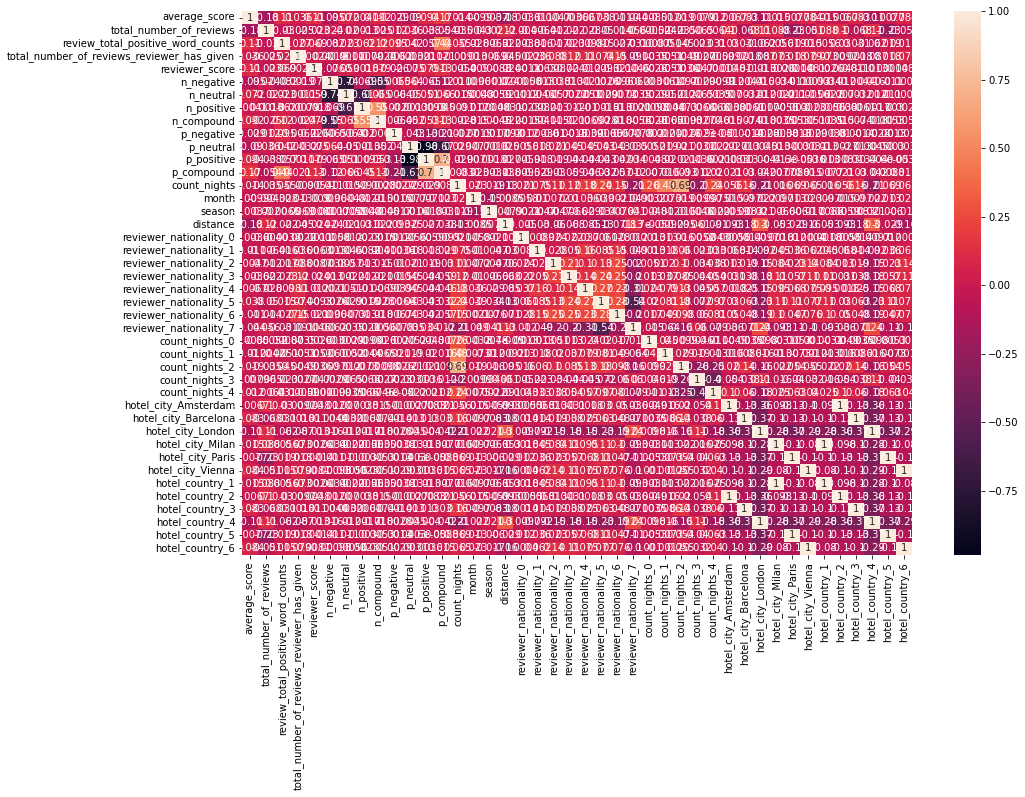

In [258]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 55 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   review_date                                 515738 non-null  datetime64[ns]
 2   average_score                               515738 non-null  float64       
 3   hotel_name                                  515738 non-null  object        
 4   reviewer_nationality                        515738 non-null  object        
 5   negative_review                             515738 non-null  object        
 6   total_number_of_reviews                     515738 non-null  int64         
 7   positive_review                             515738 non-null  object        
 8   review_total_positive_word_counts           515738 non-null  int64        

In [260]:
#plt.rcParams['figure.figsize'] = (15,10)
#sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

In [261]:
# убираем признаки с dtypes "object" 
object_columns = data.select_dtypes(include=['object']).columns #пришлось заменить код,который был
                                                                #в образце, выдавал ошибку
data.drop(object_columns, axis = 1, inplace=True)

In [262]:
# убираем признаки dtypes datetime64
data=data.drop(['review_date', 'month'], axis=1)

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   average_score                               515738 non-null  float64
 1   total_number_of_reviews                     515738 non-null  int64  
 2   review_total_positive_word_counts           515738 non-null  int64  
 3   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 4   sample                                      515738 non-null  int64  
 5   reviewer_score                              515738 non-null  float64
 6   n_negative                                  515738 non-null  float64
 7   n_neutral                                   515738 non-null  float64
 8   n_positive                                  515738 non-null  float64
 9   n_compound                                  515738 non-null  float64
 

In [264]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [265]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [266]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 41), (386803, 41), (386803, 40), (309442, 40), (77361, 40))

In [267]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [268]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [269]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [270]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred))

MAPE: 0.9263985987824199


<AxesSubplot:>

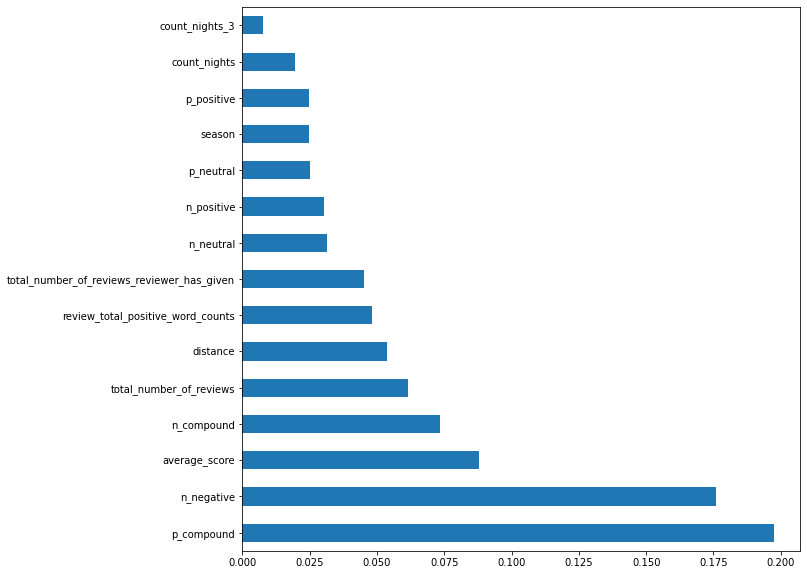

In [271]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [272]:
test_data.sample(10)

,average_score,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,n_negative,n_neutral,n_positive,n_compound,p_negative,...,hotel_city_London,hotel_city_Milan,hotel_city_Paris,hotel_city_Vienna,hotel_country_1,hotel_country_2,hotel_country_3,hotel_country_4,hotel_country_5,hotel_country_6
9273,8.2,1281,31,24,0.0,0.041,0.959,0.000,-0.1027,0.000,...,0,0,1,0,0,0,0,0,1,0
110345,7.9,1532,5,4,0.0,0.000,1.000,0.000,0.0000,0.000,...,1,0,0,0,0,0,0,1,0,0
66853,8.8,1803,13,1,0.0,0.154,0.846,0.000,-0.4439,0.000,...,1,0,0,0,0,0,0,1,0,0
17839,7.9,353,7,1,0.0,0.000,1.000,0.000,0.0000,0.000,...,0,0,0,0,0,0,1,0,0,0
88521,9.3,1608,19,1,0.0,0.000,1.000,0.000,0.0000,0.000,...,1,0,0,0,0,0,0,1,0,0
116689,8.9,219,10,12,0.0,0.000,1.000,0.000,0.0000,0.000,...,0,1,0,0,1,0,0,0,0,0
74784,8.6,4379,4,1,0.0,0.580,0.420,0.000,-0.6296,0.000,...,0,0,0,0,0,0,1,0,0,0
43980,9.1,3883,18,1,0.0,0.000,1.000,0.000,0.0000,0.000,...,0,0,0,1,0,0,0,0,0,1
101977,8.9,7108,35,1,0.0,0.205,0.646,0.149,-0.5023,0.000,...,0,0,0,0,0,1,0,0,0,0
93063,8.1,1463,37,3,0.0,0.000,1.000,0.000,0.0000,0.107,...,0,0,1,0,0,0,0,0,1,0


In [273]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [274]:
sample_submission

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596
...,...,...
128930,7,495812
128931,1,315577
128932,3,511968
128933,6,303386


In [275]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.6s finished


In [276]:
predict_submission

array([8.793     , 7.177     , 8.002     , ..., 8.046     , 9.359     ,
       7.88433333])

In [277]:
list(sample_submission)

['reviewer_score', 'id']

In [278]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,reviewer_score,id
0,8.793,488440
1,7.177,274649
2,8.002,374688
3,9.570,404352
4,9.450,451596
5,8.980,302161
6,6.877,317079
7,7.389,13963
8,8.315,159785
9,7.675,195089
